In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [29]:
data20 = pd.read_csv(filepath_or_buffer="data/Data2020.csv",index_col=0, sep="\t", decimal=",",encoding='UTF-16 LE')
data21 = pd.read_csv(filepath_or_buffer="data/Data2021.csv",index_col=0, sep="\t", decimal=",",encoding='UTF-16 LE')

In [30]:
data20 = data20.fillna(0) # fill empty cells with 0
data20 = data20.round()
data20 = data20.astype(int) # remove decimal

data21 = data21.fillna(0) # fill empty cells with 0
data21 = data21.round()
data21 = data21.astype(int) # remove decimal

In [58]:
vmax = data21.values.max()

In [59]:
def heatmap(data, vmax):
    fig, ax = plt.subplots()
    im = ax.imshow(data.values, vmin=0, vmax=vmax)

    ax.set_title("Incidence by age")

    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_yticks(np.arange(len(data.index)))

    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.index)

    ax.set_xlabel("Week")
    ax.set_ylabel("Age")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cbar = ax.figure.colorbar(im, cax=cax)
    cbar.ax.set_ylabel("Incidence", rotation=-90, va="bottom")

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    plt.figtext(0.5, 0.1, "»Robert Koch-Institut: SurvStat@RKI 2.0, https://survstat.rki.de, Abfragedatum: 22.01.2021« ", ha="center")

    for i in range(len(data.index)):
        for j in range(len(data.columns)):
            if data.values[i, j] > 400:
                color = "b"
            else:
                color = "w"
            text = ax.text(j, i, data.values[i, j], ha="center", va="center", color=color)
    
    fig.subplots_adjust(bottom=0.2)
    fig.set_size_inches(20, 10)
    plt.show()

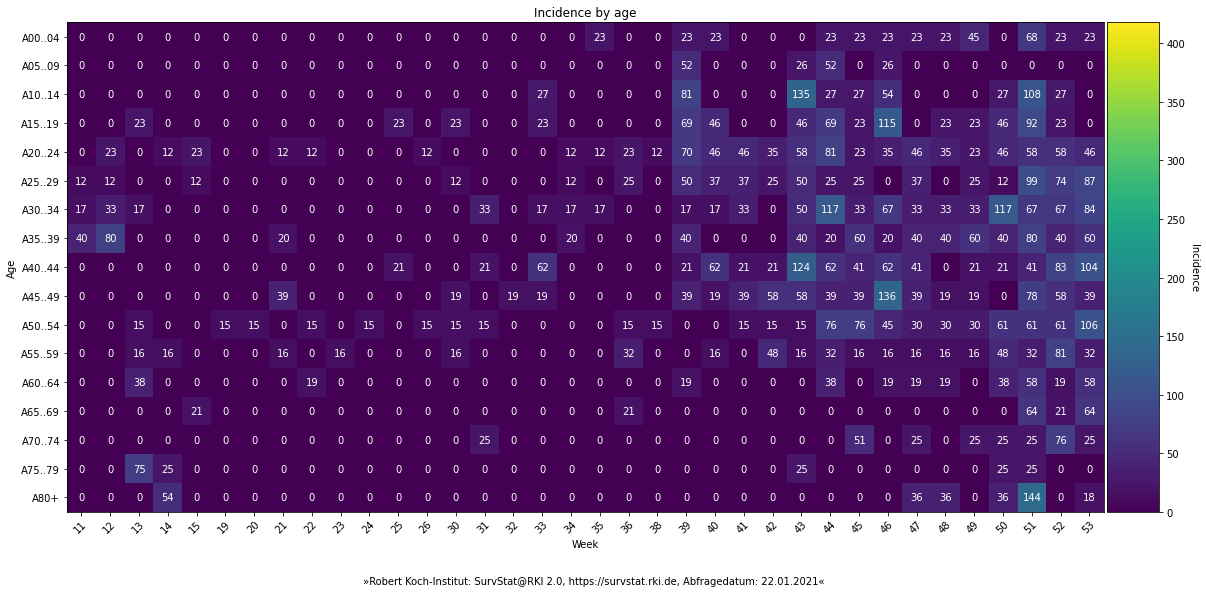

In [60]:
heatmap(data20, vmax)

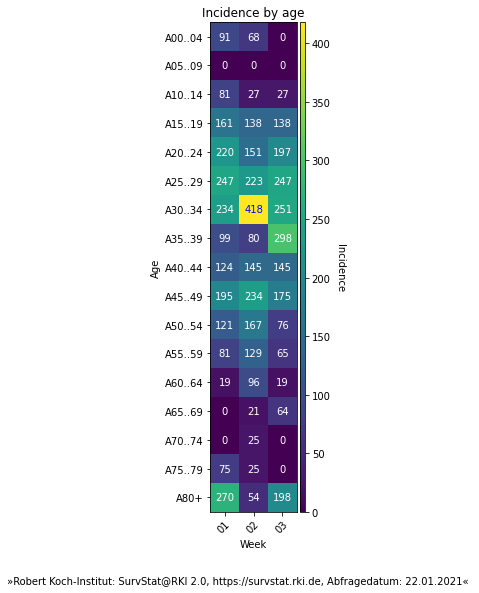

In [61]:
heatmap(data21, vmax)